In [1]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [4]:
model = tf.keras.Sequential()

In [5]:
model.add(tf.keras.layers.Dense(units=1, input_dim=2))

In [6]:
# use sigmoid activation for 0~1 problem
model.add(tf.keras.layers.Activation('sigmoid'))
#relu - no learning
#model.add(tf.keras.layers.Activation('relu'))

In [7]:
''' 
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_data, y_data, epochs=5000,verbose=0)

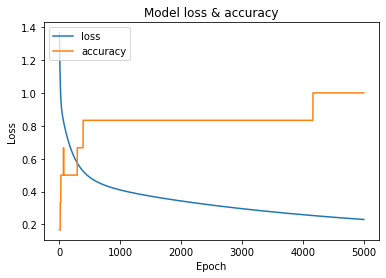

[1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [11]:
# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

Accuracy:  1.0
